# Imports

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Arquivos com as curvas

## Infocom

In [29]:
infocom_maxprop = "reports-22-12-19/infocom/maxprop/gnuplot/{}"
infocom_snw = "reports-22-12-19/infocom/snw/gnuplot/{}"
infocom_snwcm = "reports-22-12-19/infocom/snwcm/gnuplot/{}"
infocom_prophetv2 = "reports-22-12-19/infocom/prophetv2/gnuplot/{}"
infocom_prophetv2cm = "reports-22-12-19/infocom/prophetv2cm/gnuplot/{}"
infocom_files = [(infocom_maxprop, "MaxProp"), (infocom_snw, "SnW"), 
                 (infocom_snwcm, "SnWCM"), (infocom_prophetv2, "ProphetV2"), 
                 (infocom_prophetv2cm, "ProphetV2CM")]

## Rollernet

In [30]:
rollernet_maxprop = "reports-22-12-19/rollernet/maxprop/gnuplot/{}"
rollernet_snw = "reports-22-12-19/rollernet/snw/gnuplot/{}"
rollernet_snwcm = "reports-22-12-19/rollernet/snwcm/gnuplot/{}"
rollernet_prophetv2 = "reports-22-12-19/rollernet/prophetv2/gnuplot/{}"
rollernet_prophetv2cm = "reports-22-12-19/rollernet/prophetv2cm/gnuplot/{}"
rollernet_files = [(rollernet_maxprop, "MaxProp"), (rollernet_snw, "SnW"), 
                 (rollernet_snwcm, "SnWCM"), (rollernet_prophetv2, "ProphetV2"), 
                 (rollernet_prophetv2cm, "ProphetV2CM")]

In [31]:
métricas = [("delivery_rate.agregado.gnuplot", "Taxa de Entrega"),
            ("overhead.agregado.gnuplot", "Sobrecarga"),
            ("latency.agregado.gnuplot", "Latência (s)")]
m_delivery = métricas[0]
m_overhead = métricas[1]
m_latency = métricas[2]

In [32]:
curve = rollernet_maxprop.format(métricas[0][0])
curve

'reports-22-12-19/rollernet/maxprop/gnuplot/delivery_rate.agregado.gnuplot'

In [33]:
data = np.genfromtxt(curve) #gera um array multidimensional do arquivo
data

array([[0.00000e+00, 9.91600e-01, 2.76440e-03],
       [1.00000e+00, 9.91400e-01, 4.10526e-03],
       [2.00000e+00, 9.90400e-01, 3.07594e-03],
       [3.00000e+00, 9.90200e-01, 3.26601e-03],
       [4.00000e+00, 9.91600e-01, 3.92107e-03],
       [5.00000e+00, 9.87800e-01, 5.06732e-03]])

In [34]:
data[:,0] #pega a primeira coluna

array([0., 1., 2., 3., 4., 5.])

In [35]:
df=pd.DataFrame({'x': data[:,0], 'y': data[:,1], 'confidence': data[:,2]})

In [36]:
df

,x,y,confidence
0,0.0,0.9916,0.002764
1,1.0,0.9914,0.004105
2,2.0,0.9904,0.003076
3,3.0,0.9902,0.003266
4,4.0,0.9916,0.003921
5,5.0,0.9878,0.005067


# Rollernet

## Taxa de Entrega

In [37]:
curvas = []
curvas

[]

In [38]:
for f in rollernet_files:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas.append(df)

In [39]:
curvas

[     x  MaxProp  confidence
 0  0.0   0.9916    0.002764
 1  1.0   0.9914    0.004105
 2  2.0   0.9904    0.003076
 3  3.0   0.9902    0.003266
 4  4.0   0.9916    0.003921
 5  5.0   0.9878    0.005067,      x     SnW  confidence
 0  0.0  0.8792    0.006189
 1  1.0  0.8692    0.013064
 2  2.0  0.8696    0.013127
 3  3.0  0.8538    0.007584
 4  4.0  0.8662    0.011295
 5  5.0  0.8628    0.012495,      x   SnWCM  confidence
 0  0.0  0.8794    0.006400
 1  1.0  0.8716    0.011462
 2  2.0  0.8734    0.012939
 3  3.0  0.8582    0.006793
 4  4.0  0.8714    0.012066
 5  5.0  0.8660    0.013353,      x  ProphetV2  confidence
 0  0.0     0.6358    0.010843
 1  1.0     0.6320    0.013673
 2  2.0     0.6340    0.013370
 3  3.0     0.6166    0.010834
 4  4.0     0.6418    0.015708
 5  5.0     0.6322    0.011071,      x  ProphetV2CM  confidence
 0  0.0       0.6680    0.015306
 1  1.0       0.6574    0.015366
 2  2.0       0.6496    0.013502
 3  3.0       0.6498    0.009761
 4  4.0       0.6550   

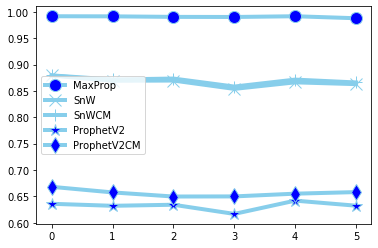

In [40]:
styles = {'markers':('o','x','+','*','d'),
          'colors' : ('red','green', 'blue', 'black', 'yellow'),
          'linestyles' : ('solid','dashed','dotted','dashdot','solid')
         }

for num, curva in enumerate(curvas):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()

# Infocom05

## Taxa de Entrega

In [41]:
curvas_infocom = []

In [42]:
for f in infocom_files:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas_infocom.append(df)

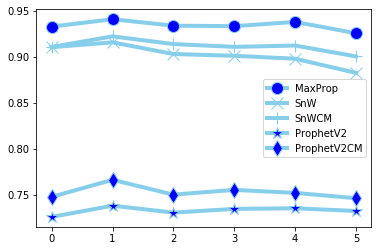

In [43]:
for num, curva in enumerate(curvas_infocom):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()

# REALBLACKHOLE

In [44]:
infocom_prophetv2 = "realblackhole/infocom/prophetv2/gnuplot/{}"
infocom_prophetv2cm = "realblackhole/infocom/prophetv2cm/gnuplot/{}"
rollernet_prophetv2 = "realblackhole/rollernet/prophetv2/gnuplot/{}"
rollernet_prophetv2cm = "realblackhole/rollernet/prophetv2cm/gnuplot/{}"
realblackhole_files = [(infocom_prophetv2, "ProphetV2 Infocom"), 
                       (infocom_prophetv2cm, "ProphetV2CM Infocom"),
                       (rollernet_prophetv2, "ProphetV2 Rollernet"),
                       (rollernet_prophetv2cm, "ProphetV2CM Rollernet"),
                      ]

In [45]:
curvas = []
for f in realblackhole_files:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas.append(df)

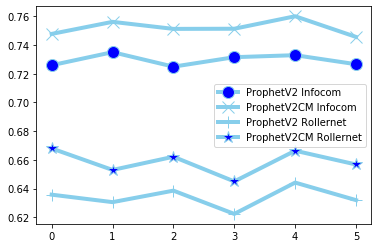

In [46]:
for num, curva in enumerate(curvas):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()

In [55]:
comparison_infocom_scenarios = [(realblackhole_files[0][0], "ProphetV2 Realblackhole"),
                        (realblackhole_files[1][0]," ProphetV2CM Realblackhole"),
                        (infocom_files[3][0], "ProphetV2"),
                        (infocom_files[4][0], "ProphetV2CM")]

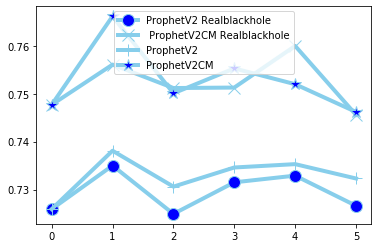

In [56]:
curvas = []
for f in comparison_infocom_scenarios:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas.append(df)

for num, curva in enumerate(curvas):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()

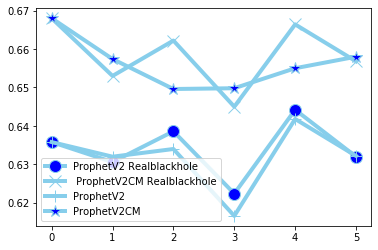

In [57]:
comparison_rollernet_scenarios = [(realblackhole_files[2][0], "ProphetV2 Realblackhole"),
                        (realblackhole_files[3][0]," ProphetV2CM Realblackhole"),
                        (rollernet_files[3][0], "ProphetV2"),
                        (rollernet_files[4][0], "ProphetV2CM")]
curvas = []
for f in comparison_rollernet_scenarios:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas.append(df)

for num, curva in enumerate(curvas):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()

In [58]:
buffer_infocom_maxprop = "50porcento/infocom/maxprop/gnuplot/{}"
buffer_infocom_snw = "50porcento/infocom/snw/gnuplot/{}"
buffer_infocom_snwcm = "50porcento/infocom/snwcm/gnuplot/{}"
buffer_infocom_prophetv2 = "50porcento/infocom/prophetv2/gnuplot/{}"
buffer_infocom_prophetv2cm = "50porcento/infocom/prophetv2cm/gnuplot/{}"
buffer_infocom_files = [(buffer_infocom_maxprop, "MaxProp"), (buffer_infocom_snw, "SnW"), 
                 (buffer_infocom_snwcm, "SnWCM"), (buffer_infocom_prophetv2, "ProphetV2"), 
                 (buffer_infocom_prophetv2cm, "ProphetV2CM")]

buffer_rollernet_maxprop = "50porcento/rollernet/maxprop/gnuplot/{}"
buffer_rollernet_snw = "50porcento/rollernet/snw/gnuplot/{}"
buffer_rollernet_snwcm = "50porcento/rollernet/snwcm/gnuplot/{}"
buffer_rollernet_prophetv2 = "50porcento/rollernet/prophetv2/gnuplot/{}"
buffer_rollernet_prophetv2cm = "50porcento/rollernet/prophetv2cm/gnuplot/{}"
buffer_rollernet_files = [(buffer_rollernet_maxprop, "MaxProp"), (buffer_rollernet_snw, "SnW"), 
                 (buffer_rollernet_snwcm, "SnWCM"), (buffer_rollernet_prophetv2, "ProphetV2"), 
                 (buffer_rollernet_prophetv2cm, "ProphetV2CM")]

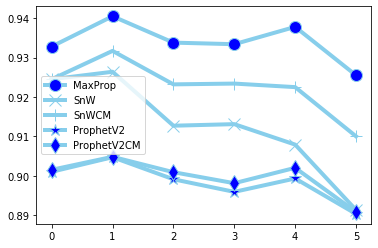

In [60]:
curvas_infocom = []
for f in buffer_infocom_files:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas_infocom.append(df)
    
for num, curva in enumerate(curvas_infocom):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()

## rolernet

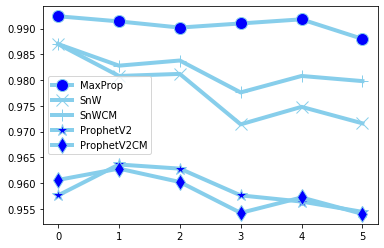

In [61]:
curvas_rollernet = []
for f in buffer_rollernet_files:
    file_location = f[0].format(m_delivery[0])
    label = f[1]
    data = np.genfromtxt(file_location)
    df=pd.DataFrame({'x': data[:,0], label: data[:,1], 'confidence': data[:,2]})
    curvas_rollernet.append(df)
    
for num, curva in enumerate(curvas_rollernet):
    curva.columns.values[1]
    plt.plot('x', curva.columns.values[1], data=curva, marker=styles['markers'][num], markerfacecolor='blue',
             markersize=12, color='skyblue', linewidth=4)
plt.legend()